In [2]:
from dash import dcc, html, Input, Output, Dash
import plotly.express as px
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv ("../data/merged_APPA_data.csv", encoding='windows-1252') 
df=df[df.Valore != 'n.d.']
df.Valore= pd.to_numeric(df.Valore)
df.head()

,Stazione,Inquinante,Data,Valore,UnitÃ di misura
0,A22 (Avio),Biossido di Azoto,2017-01-01 01:00:00,54.0,Âµg/mc
1,A22 (Avio),Biossido di Azoto,2017-01-01 02:00:00,58.0,Âµg/mc
2,A22 (Avio),Biossido di Azoto,2017-01-01 03:00:00,54.0,Âµg/mc
3,A22 (Avio),Biossido di Azoto,2017-01-01 04:00:00,54.0,Âµg/mc
4,A22 (Avio),Biossido di Azoto,2017-01-01 05:00:00,50.0,Âµg/mc


In [9]:
df["Data"]=pd.to_datetime(df.Data)
print(df.Data.dt.hour)

0           1
1           2
2           3
3           4
4           5
           ..
2278753    20
2278754    21
2278755    22
2278756    23
2278757     0
Name: Data, Length: 2278758, dtype: int64


     Year  WeekDay  Hour     Valore
0    2018        0     0  15.647059
1    2018        0     1  15.346154
2    2018        0     2  14.538462
3    2018        0     3  14.250000
4    2018        0     4  14.153846
..    ...      ...   ...        ...
163  2018        6    19  17.420000
164  2018        6    20  16.560000
165  2018        6    21  15.960784
166  2018        6    22  15.392157
167  2018        6    23  15.156863

[168 rows x 4 columns]


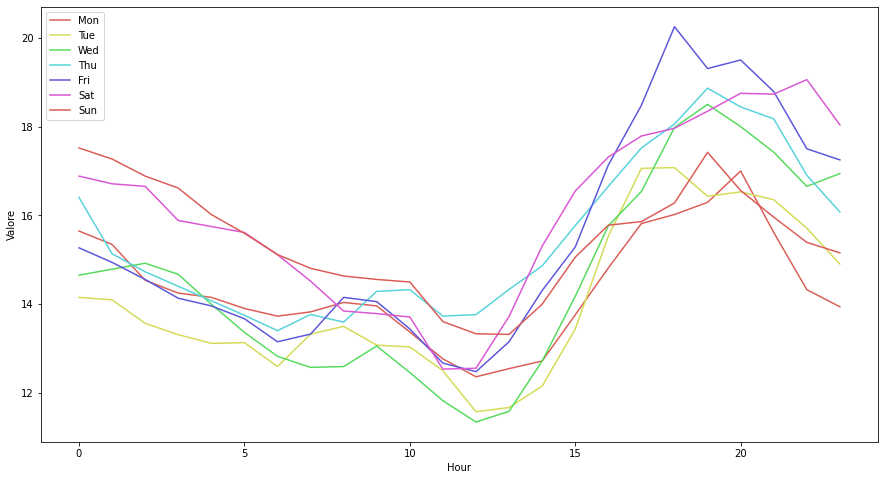

In [9]:
#Plot Daily  3rd Section
from matplotlib.pyplot import xticks
df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

df_daily_avg = df[(df.Stazione == "Rovereto") & (df.Inquinante == "PM2.5") & (df.Data.dt.year == 2018)]
df_daily_avg = df_daily_avg.groupby(pd.PeriodIndex(df_daily_avg['Data'], freq="H"))['Valore'].mean()
df_daily_avg = df_daily_avg.reset_index()
df_daily_avg = df_daily_avg.groupby([df_daily_avg.Data.dt.year, df_daily_avg.Data.dt.day_of_week, df_daily_avg.Data.dt.hour]).mean()
df_daily_avg.index.names = ["Year", "WeekDay", "Hour"]
df_daily_avg = df_daily_avg.reset_index()
print(df_daily_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Hour", hue="WeekDay", palette="hls", data=df_daily_avg)
plt.legend(labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()